# 高维数据映射到地位数据

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0, 10.0, size=100)

In [59]:
def demean(X):
    return X - np.mean(X, axis=0)

X = demean(X)  

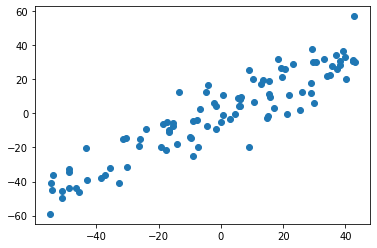

In [60]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [61]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)                # 注意1： 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w 

In [62]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.75826358, 0.65194812])

In [63]:
# 求样本在第二个维度上的主成分
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] - X[i].dot(w) * w

X2 = X - X.dot(w).reshape(-1, 1) * w

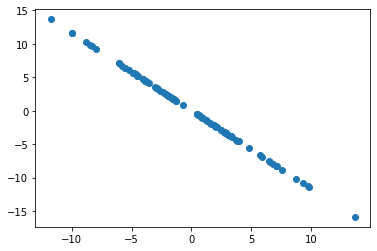

In [64]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [65]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.65194498,  0.75826628])

In [66]:
w.dot(w2)

4.1402539127655125e-06

In [67]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)

        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    
    return res

In [69]:
res = first_n_components(X.shape[1], X)
res

[array([0.75826355, 0.65194815]), array([-0.65194472,  0.7582665 ])]